In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import collections
import numpy.fft as fft
import collections
from scipy.signal import find_peaks

In [2]:
### VALEURS CONSTANTES
nCell = 10000
##constantes
n = 2
alpha = 111
kappa = 20
k_s0 = 1
k_s1 = 0.01
t = 600
eta = 2.0
Q = 0.4
beta = []
for i in range(nCell):
    beta.append(random.gauss(1,0.05))
tau = 0.3 ##a voir

# RANGE KUTA

In [3]:
### Initialisation des matrices
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

a[:,0] = 0
b[:,0] = 50
c[:,0] = 0

A[:,0] = 0
B[:,0] = 0
C[:,0] = 0

S[:,0] = 0
Se[:,0] = 0

In [4]:
### Calcul des valeurs
for j in range(0, t-1):
    for i in range(0, nCell):
        #Se[i, j] = Q * np.mean(S[:, j])

        abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/(1+S[i,j])))

        Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
        Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
        Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

        Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

        a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
        b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
        c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/(1+Sbis)))

        A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
        B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
        C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

        S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))
        
        Se[i,j+1] = Q*np.mean(S[:,j])

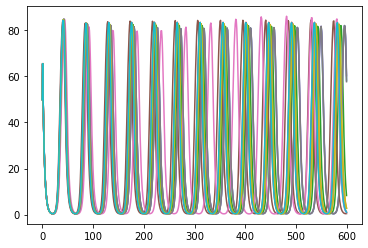

In [6]:
### Plot de b
cellToPlot = [random.randint(0, nCell) for p in range(0, 10)]
time = np.arange(0,t)
for i in cellToPlot:
    plt.plot(time,b[i])

In [7]:
tot_freq=[]
for i in range(nCell):
    peaks, _ = find_peaks(b[i])
    peaks_l, _ = find_peaks(-b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 and n < len(peaks_l)-1:
            period = peaks[n+1]-peaks[n]
            period_l = peaks_l[n+1]-peaks_l[n]
            freqs.append(period)
            freqs.append(period_l)
        else :
            break
        n+=1
    tot_freq.append(1/np.mean(freqs))

(array([2.000e+00, 1.000e+01, 2.900e+01, 3.100e+01, 8.500e+01, 1.140e+02,
        1.680e+02, 2.450e+02, 5.090e+02, 1.031e+03, 2.064e+03, 2.888e+03,
        1.821e+03, 7.860e+02, 1.550e+02, 5.300e+01, 7.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([0.02  , 0.0202, 0.0204, 0.0206, 0.0208, 0.021 , 0.0212, 0.0214,
        0.0216, 0.0218, 0.022 , 0.0222, 0.0224, 0.0226, 0.0228, 0.023 ,
        0.0232, 0.0234, 0.0236, 0.0238, 0.024 , 0.0242, 0.0244, 0.0246,
        0.0248, 0.025 , 0.0252, 0.0254, 0.0256, 0.0258, 0.026 , 0.0262,
        0.0264, 0.0266, 0.0268, 0.027 , 0.0272, 0.0274, 0.0276, 0.0278,
        0.028 , 

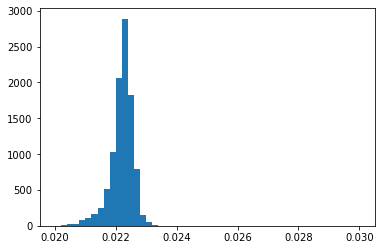

In [8]:
### Plot des fréquences
plt.hist(tot_freq, bins = 50, range =(0.02,0.03))

# ANALYZE 

In [2]:
def M(t, b, nCell):
    return 1/nCell * sum(b[0:nCell,t])

In [3]:
def R(t1, t2, b, nCell):
    M_values = []
    b_values = []
    
    for t in range(t1, t2):
        M_values.append(M(t, b, nCell))
    
    num = np.mean(np.power(M_values,2)) - np.power(np.mean(M_values),2)

    for i in range(0, nCell):
        bi2_values = []
        b2i_values = []
        b2i_values.append(b[i,t1:t2]**2)
        bi2_values.append(b[i,t1:t2])
        
        b_values.append(np.mean(b2i_values) - np.mean(bi2_values)**2)     
    
    den = np.mean(b_values)
    if den > 0:
        return num/den
    else:
        return 0

In [7]:
nCell = 10
##constantes
n = 2
alpha = 116
kappa = 20
k_s0 = 1
k_s1 = 0.01
t = 1000
eta = 2.0
tau = 0.3 ##a voir

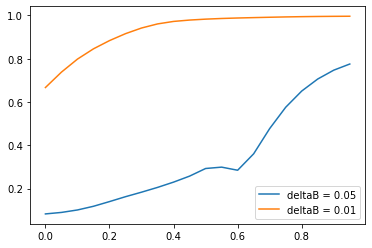

In [8]:
for deltaB in [0.05, 0.01]:
    Q_values = []
    R_values = []
    beta = []
    for i in range(nCell):
        beta.append(random.gauss(1, deltaB))
    for Q in np.arange(0, 1, 0.05):
        ### Initialisation des matrices
        a = np.zeros((nCell, t))
        b = np.zeros((nCell, t))
        c = np.zeros((nCell, t))

        A = np.zeros((nCell, t))
        B = np.zeros((nCell, t))
        C = np.zeros((nCell, t))

        S = np.zeros((nCell, t))
        Se = np.zeros((nCell, t))

        a[:,0] = 0
        b[:,0] = 50
        c[:,0] = 0

        A[:,0] = 0
        B[:,0] = 0
        C[:,0] = 0

        S[:,0] = 0
        Se[:,0] = 0

        ### Calcul des valeurs
        for j in range(0, t-1):
            for i in range(0, nCell):
                #Se[i, j] = Q * np.mean(S[:, j])

                abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
                bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
                cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

                Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
                Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
                Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

                Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

                a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
                b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
                c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

                A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
                B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
                C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

                S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))
                
                Se[i,j+1] = Q*np.mean(S[:,j])
                
        Q_values.append(Q)
        R_values.append(R(900, 1000, b, nCell))
    plt.plot(Q_values, R_values, label= str("deltaB = " + str(deltaB)))
    plt.legend()


/Users/Elodie/miniconda/envs/workEnv/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in double_scalars
/Users/Elodie/miniconda/envs/workEnv/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/Users/Elodie/miniconda/envs/workEnv/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/Users/Elodie/miniconda/envs/workEnv/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
/Users/Elodie/miniconda/envs/workEnv/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars
/Users/Elodie/miniconda/envs/workEnv/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/Elodie/miniconda/envs/workEnv/lib/python3.7/site-packages/i

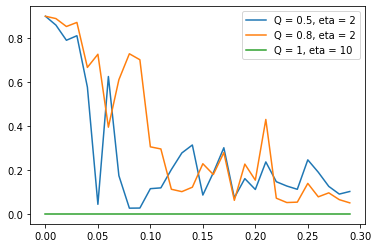

In [14]:
for Q, eta in (0.5, 2), (0.8, 2), (1, 10):
    deltaB_values = []
    R_values = []

    for deltaB in np.arange(0, 0.3, 0.01):
        beta = []
        for i in range(nCell):
            beta.append(random.gauss(1, deltaB))

        ### Initialisation des matrices
        a = np.zeros((nCell, t))
        b = np.zeros((nCell, t))
        c = np.zeros((nCell, t))

        A = np.zeros((nCell, t))
        B = np.zeros((nCell, t))
        C = np.zeros((nCell, t))

        S = np.zeros((nCell, t))
        Se = np.zeros((nCell, t))

        a[:,0] = random.randint(0, 100)
        b[:,0] = random.randint(0, 100)
        c[:,0] = random.randint(0, 100)

        A[:,0] = random.randint(0, 100)
        B[:,0] = random.randint(0, 100)
        C[:,0] = random.randint(0, 100)

        S[:,0] = random.randint(0, 100)
        Se[:,0] = random.randint(0, 100)

        ### Calcul des valeurs
        for j in range(1, t-1):
            for i in range(1, nCell):
                abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
                bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
                cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/(1+S[i,j])))

                Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
                Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
                Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

                Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

                a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
                b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
                c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/(1+Sbis)))

                A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
                B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
                C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

                S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))
                
                Se[i,j+1] = Q*np.mean(S[:,j])

        deltaB_values.append(deltaB)
        R_values.append(R(800, 1000, b, nCell))
    plt.plot(deltaB_values, R_values, label = str("Q = " + str(Q) + ", eta = " + str(eta)))
    plt.legend()